In [211]:
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import datasets, linear_model  
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols
import patsy

In [234]:
data = pd.read_csv('data_state.csv',sep=',') 
data['intercept'] = 1.0
data.head()

,State,Legal_Aid_Attorneys_per_capita,unsheltered_homelessness_ratio,ratio,rental_price_average,Gini_coefficients,without_health_insurance,POP_ST,POPPCT_URBAN,intercept
0,Alabama,0.000025,0.000251,10.071921,0.655461,0.485,9.1,4779736,59.04,1.0
1,Alaska,0.000113,0.000600,5.286890,1.212974,0.408,14.0,710231,66.02,1.0
2,Arizona,0.000042,0.000482,11.413810,0.816850,0.471,10.0,6392017,89.81,1.0
3,Arkansas,0.000033,0.000286,8.578452,0.713312,0.472,7.9,2915918,56.16,1.0
4,California,0.000044,0.002020,45.891819,1.640888,0.490,7.3,37253956,94.95,1.0


In [235]:
data.describe()

,Legal_Aid_Attorneys_per_capita,unsheltered_homelessness_ratio,ratio,rental_price_average,Gini_coefficients,without_health_insurance,POP_ST,POPPCT_URBAN,intercept
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,5.100000e+01,51.000000,51.0
mean,0.000079,0.000415,7.678371,1.071710,0.468294,7.90000,6.053834e+06,74.099804,1.0
std,0.000129,0.000572,8.774832,0.439878,0.027864,3.04447,6.823984e+06,14.885178,0.0
min,0.000024,0.000035,0.478821,0.655461,0.408000,2.50000,5.636260e+05,38.660000,1.0
25%,0.000037,0.000106,1.867531,0.802998,0.452000,5.60000,1.696962e+06,65.390000,1.0
50%,0.000047,0.000232,4.284071,0.930944,0.468000,8.00000,4.339367e+06,74.200000,1.0
75%,0.000073,0.000470,11.030929,1.180264,0.479500,9.60000,6.636084e+06,87.535000,1.0
max,0.000933,0.003035,45.891819,2.866655,0.590000,16.60000,3.725396e+07,100.000000,1.0


In [236]:
data.columns

Index(['State', 'Legal_Aid_Attorneys_per_capita',
       'unsheltered_homelessness_ratio', 'ratio', 'rental_price_average',
       'Gini_coefficients', 'without_health_insurance', 'POP_ST',
       'POPPCT_URBAN', 'intercept'],
      dtype='object')

In [238]:
#independent_factors = ['rental price average','Gini coefficients','w/o health insurance%','POP_ST','POPPCT_URBAN','intercept']
independent_factors = ['rental_price_average','Gini_coefficients','without_health_insurance','POP_ST','POPPCT_URBAN']
independent_factors_l = ['Legal_Aid_Attorneys_per_capita','rental_price_average','Gini_coefficients','without_health_insurance','POP_ST','POPPCT_URBAN']
independent_factors_h = ['unsheltered_homelessness_ratio','rental_price_average','Gini_coefficients','without_health_insurance','POP_ST','POPPCT_URBAN']
X = data[independent_factors]
X_l = data[independent_factors_l]
X_h = data[independent_factors_h]

In [239]:
y_legal = data['Legal_Aid_Attorneys_per_capita'].values
y_homeless = data['unsheltered_homelessness_ratio']
y_ratio = data['ratio']
x_rental = data['rental_price_average'].values
x_gini = data['Gini_coefficients']
x_health = data['without_health_insurance']
x_pop = data['POP_ST']
x_urban = data['POPPCT_URBAN']

a = ['Legal_Aid_Attorneys_per_capita','intercept']
b = ['unsheltered_homelessness_ratio','intercept']
y_legal_intercept = data[a]
y_homeless_intercept = data[b]

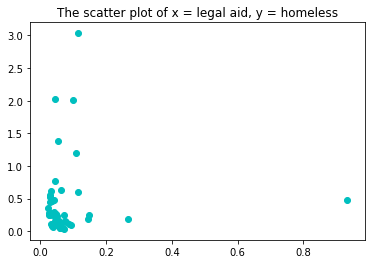

(0.062703550886986453, 0.66202273097006681)


In [219]:
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = legal aid, y = homeless')  
ax1.scatter(y_legal*1000,y_homeless*1000,c = 'c',marker = 'o')
plt.show()
print(pearsonr(y_homeless, y_legal))
#(Pearson’s correlation coefficient,2-tailed p-value) 
#this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. 
#Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

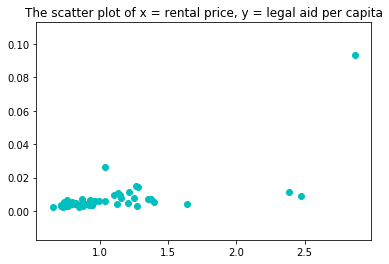

(0.65438527931085311, 1.9061981985307722e-07)


In [220]:
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = rental price, y = legal aid per capita')  
ax1.scatter(x_rental,y_legal*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_rental, y_legal))

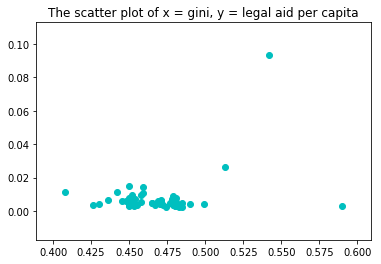

(0.34247704393947004, 0.013892217275455546)


In [174]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = gini, y = legal aid per capita')  
ax1.scatter(x_gini,y_legal*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_gini, y_legal))

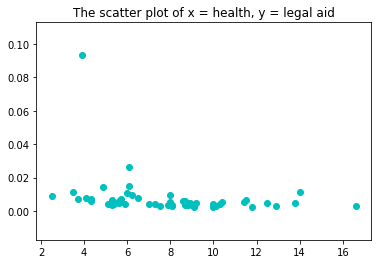

(-0.28330831060650363, 0.043951775735184481)


In [269]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = health, y = legal aid')  
ax1.scatter(x_health,y_legal*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_health, y_legal))

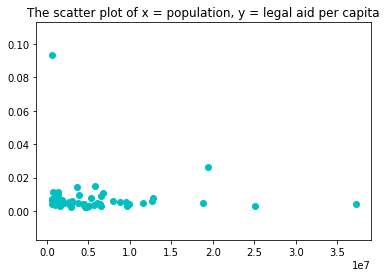

(-0.079877588831696197, 0.57739777222303235)


In [178]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = population, y = legal aid per capita')  
ax1.scatter(x_pop,y_legal*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_pop, y_legal))

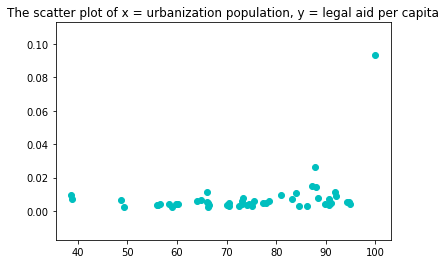

(0.31793179693874019, 0.022993430686281874)


In [179]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = urbanization population, y = legal aid per capita')  
ax1.scatter(x_urban,y_legal*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_urban, y_legal))

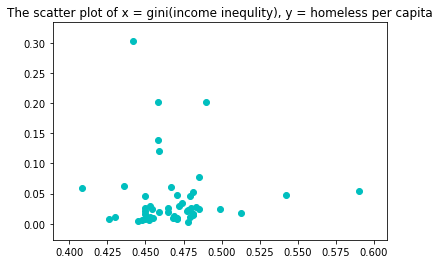

(-0.020216287492721835, 0.88802138261745511)


In [180]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = gini(income inequlity), y = homeless per capita')   
ax1.scatter(x_gini,y_homeless*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_gini, y_homeless))

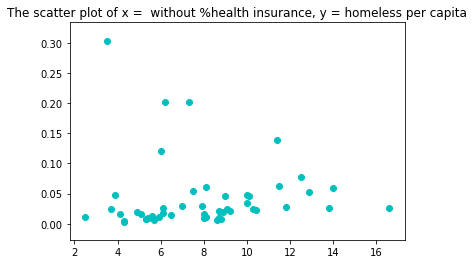

(-0.012292798799461289, 0.93177251250711735)


In [191]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x =  without %health insurance, y = homeless per capita')  
ax1.scatter(x_health,y_homeless*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_health, y_homeless))

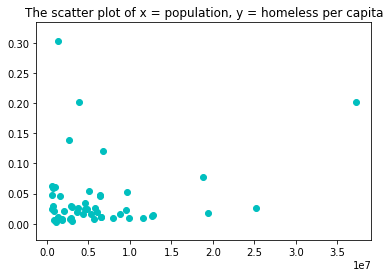

(0.18991405846351139, 0.18193548303637735)


In [182]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = population, y = homeless per capita')  
ax1.scatter(x_pop,y_homeless*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_pop, y_homeless))

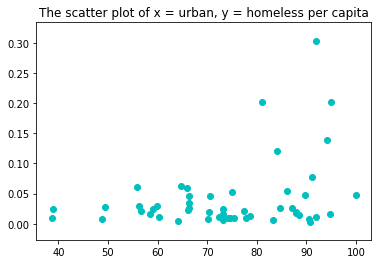

(0.31893745732337486, 0.022540448107314478)


In [183]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = urban, y = homeless per capita')  
ax1.scatter(x_urban,y_homeless*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_urban, y_homeless))

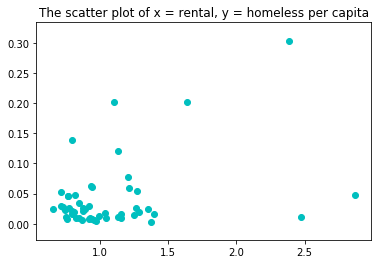

(0.37266830196070055, 0.0070774838784669917)


In [184]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = rental, y = homeless per capita')  
ax1.scatter(x_rental,y_homeless*100,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_rental, y_homeless))

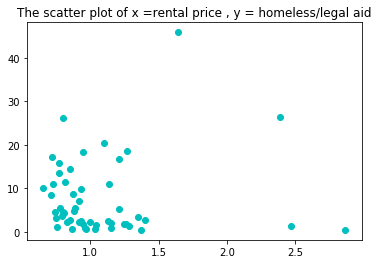

(0.084845941579177728, 0.55387151120685896)


In [185]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x =rental price , y = homeless/legal aid')  
ax1.scatter(x_rental,y_ratio,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_rental, y_ratio))

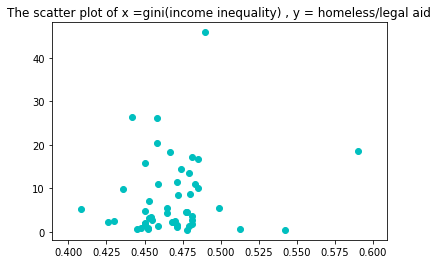

(0.16084643273759405, 0.25950710831541784)


In [186]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x =gini(income inequality) , y = homeless/legal aid')  
ax1.scatter(x_gini,y_ratio,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_gini, y_ratio))

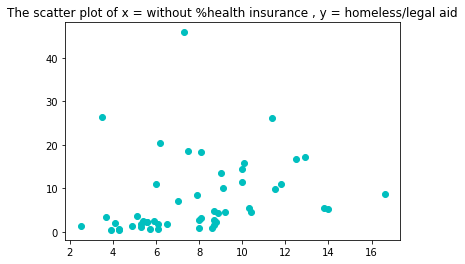

(0.25344959872448303, 0.072725789294068963)


In [192]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x = without %health insurance , y = homeless/legal aid')  
ax1.scatter(x_health,y_ratio,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_health, y_ratio))

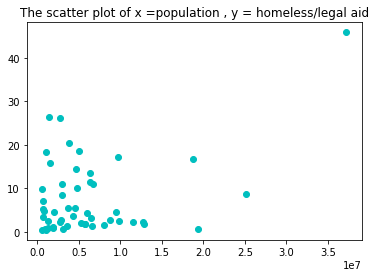

(0.39083675104642834, 0.0045727805361712648)


In [188]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x =population , y = homeless/legal aid')  
ax1.scatter(x_pop,y_ratio,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_pop, y_ratio))

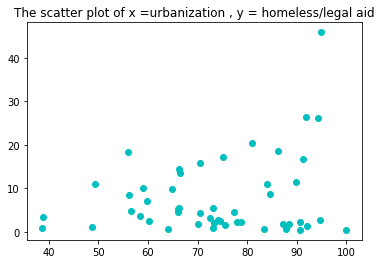

(0.20769334305803114, 0.14361600638601485)


In [189]:
import matplotlib
import matplotlib.pyplot as plt 
 
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.set_title('The scatter plot of x =urbanization , y = homeless/legal aid')  
ax1.scatter(x_urban,y_ratio,c = 'c',marker = 'o')
plt.show()
print(pearsonr(x_urban, y_ratio))

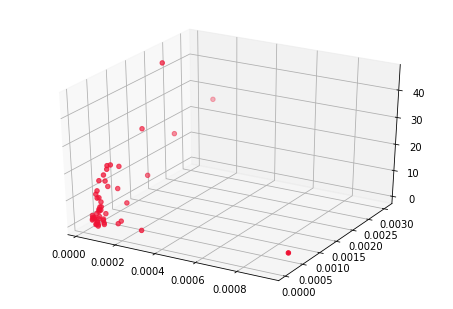

In [193]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(y_legal, y_homeless, y_ratio, color='#ef1234')
_=plt.show()

In [273]:
from sklearn.cross_validation import train_test_split
X_train, X_test= train_test_split(X, test_size=0.2, random_state=0)
X_train_l, X_test_l= train_test_split(X_l, test_size=0.2, random_state=0)
X_train_h, X_test_h= train_test_split(X_h, test_size=0.2, random_state=0)
y_train_homeless, y_test_homeless = train_test_split(y_homeless, test_size=0.2, random_state=0)
y_train_legal, y_test_legal = train_test_split(y_legal, test_size=0.2, random_state=0)
y_train_ratio, y_test_ratio = train_test_split(y_ratio, test_size=0.2, random_state=0)
y_train_legal_intercept,y_test_legal_intercept = train_test_split(y_legal_intercept, test_size=0.2, random_state=0)
y_train_homeless_intercept,y_test_homeless_intercept = train_test_split(y_homeless_intercept, test_size=0.2, random_state=0)

In [274]:
print(len(y_train_homeless))
print(len(y_test_homeless))
print(len(y_train_legal))
print(len(y_test_legal))
print(len(y_train_ratio))
print(len(y_test_ratio))
print(len(X_train))
print(len(X_test))
print(len(X_train_l))
print(len(X_test_l))
print(len(X_train_h))
print(len(X_test_h))

40
11
40
11
40
11
40
11
40
11
40
11


In [62]:
L = data['Legal_Aid_Attorneys_per_capita'].values * 10000
H = data['unsheltered_homelessness_ratio'].values *10000

In [75]:
mean_l = np.mean(L)
mean_h = np.mean(H)

# Total number of values
m = len(L)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (L[i] - mean_l) * (H[i] - mean_h)
    denom += (L[i] - mean_l) ** 2
b1 = numer / denom
b0 = mean_h - (b1 * mean_l)

# Print coefficients
print(b1, b0)

0.278396025967 3.93009201546


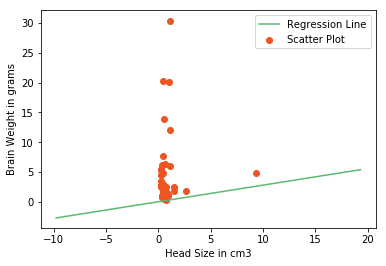

In [68]:
max_l = np.max(L)+10
min_l = np.min(L)-10

# Calculating line values x and y
l = np.linspace(min_l, max_l, 1000)
h = b0 + b1 * l

# Ploting Line
plt.plot(l, h, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(L, H, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [275]:
model = linear_model.LinearRegression()
result_2 = model.fit(y_train_legal_intercept, y_train_homeless)

In [278]:
from sklearn.metrics import mean_squared_error
y_predict_homeless = result_2.predict(y_test_legal_intercept)
MSE_1 = mean_squared_error(y_predict_homeless, y_test_homeless)
print (MSE_1)

1.07837996493e-06


In [272]:
#OLS for legal, X includes homeless
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
model_legal = sm.OLS(y_train_legal, X_train_h)
results_legal = model_legal.fit()
print(results_legal.summary())

y_pred_legal = results_legal.predict(X_test_h)
MSE_test_legal = mean_squared_error(y_test_legal, y_pred_legal)
print ('The MSE of OLS on the legal aid ratio test is %f.'%(MSE_test_legal))

                                  OLS Regression Results                                  
Dep. Variable:     Legal Aid Attorneys per capita   R-squared:                       0.693
Model:                                        OLS   Adj. R-squared:                  0.639
Method:                             Least Squares   F-statistic:                     12.78
Date:                            Tue, 10 Apr 2018   Prob (F-statistic):           1.66e-07
Time:                                    20:53:53   Log-Likelihood:                 316.12
No. Observations:                              40   AIC:                            -620.2
Df Residuals:                                  34   BIC:                            -610.1
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

In [279]:
#OLS for homeless, X includes legal aid
model_homeless = sm.OLS(y_train_homeless, X_train_l)
results_homeless = model_homeless.fit()
print(results_homeless.summary())

y_pred_homeless = results_homeless.predict(X_test_l)
MSE_test_homeless = mean_squared_error(y_test_homeless, y_pred_homeless)
print ('The MSE of OLS on the homeless ratio test is %f.'%(MSE_test_homeless))

                                  OLS Regression Results                                  
Dep. Variable:     unsheltered_homelessness_ratio   R-squared:                       0.459
Model:                                        OLS   Adj. R-squared:                  0.363
Method:                             Least Squares   F-statistic:                     4.805
Date:                            Tue, 10 Apr 2018   Prob (F-statistic):            0.00120
Time:                                    21:03:05   Log-Likelihood:                 261.98
No. Observations:                              40   AIC:                            -512.0
Df Residuals:                                  34   BIC:                            -501.8
Df Model:                                       6                                         
Covariance Type:                        nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025    

In [280]:
model_ratio = sm.OLS(y_train_ratio, X_train)
results_ratio = model_ratio.fit()
print(results_ratio.summary())

y_pred_ratio = results_ratio.predict(X_test)
MSE_test_ratio = mean_squared_error(y_test_ratio, y_pred_ratio)
print ('The MSE of OLS on the homeless ratio test is %f.'%(MSE_test_ratio))

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     11.62
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           1.16e-06
Time:                        21:11:10   Log-Likelihood:                -120.29
No. Observations:                  40   AIC:                             250.6
Df Residuals:                      35   BIC:                             259.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
rental_price_average    

Then we do the 2 degree polynominal regression

In [267]:

res_L = ols(formula='Legal_Aid_Attorneys_per_capita ~ unsheltered_homelessness_ratio * rental_price_average + unsheltered_homelessness_ratio * Gini_coefficients + unsheltered_homelessness_ratio * without_health_insurance + unsheltered_homelessness_ratio * POP_ST + unsheltered_homelessness_ratio * POPPCT_URBAN  +rental_price_average* Gini_coefficients+ rental_price_average * without_health_insurance + rental_price_average * POP_ST + rental_price_average* POPPCT_URBAN+Gini_coefficients *without_health_insurance + Gini_coefficients*POP_ST +Gini_coefficients*POPPCT_URBAN + without_health_insurance *POP_ST + without_health_insurance*POPPCT_URBAN + POP_ST*POPPCT_URBAN', data=data).fit()
print(res_L.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Legal_Aid_Attorneys_per_capita   R-squared:                       0.964
Model:                                        OLS   Adj. R-squared:                  0.940
Method:                             Least Squares   F-statistic:                     40.32
Date:                            Tue, 10 Apr 2018   Prob (F-statistic):           2.01e-16
Time:                                    16:23:43   Log-Likelihood:                 469.82
No. Observations:                              51   AIC:                            -897.6
Df Residuals:                                  30   BIC:                            -857.1
Df Model:                                      20                                         
Covariance Type:                        nonrobust                                         
                                                              coef    std err          t  

In [268]:
res_H = ols(formula='unsheltered_homelessness_ratio ~ Legal_Aid_Attorneys_per_capita * rental_price_average + Legal_Aid_Attorneys_per_capita * Gini_coefficients + Legal_Aid_Attorneys_per_capita *without_health_insurance + Legal_Aid_Attorneys_per_capita * POP_ST +Legal_Aid_Attorneys_per_capita * POPPCT_URBAN + rental_price_average* Gini_coefficients+ rental_price_average * without_health_insurance + rental_price_average * POP_ST + rental_price_average* POPPCT_URBAN+Gini_coefficients *without_health_insurance + Gini_coefficients*POP_ST +Gini_coefficients*POPPCT_URBAN + without_health_insurance *POP_ST + without_health_insurance*POPPCT_URBAN + POP_ST*POPPCT_URBAN', data=data).fit()
print(res_H.summary())

                                  OLS Regression Results                                  
Dep. Variable:     unsheltered_homelessness_ratio   R-squared:                       0.618
Model:                                        OLS   Adj. R-squared:                  0.383
Method:                             Least Squares   F-statistic:                     2.635
Date:                            Tue, 10 Apr 2018   Prob (F-statistic):            0.00804
Time:                                    16:28:00   Log-Likelihood:                 333.45
No. Observations:                              51   AIC:                            -626.9
Df Residuals:                                  31   BIC:                            -588.3
Df Model:                                      19                                         
Covariance Type:                        nonrobust                                         
                                                              coef    std err          t  

In [265]:
res_R = ols(formula='ratio ~ rental_price_average* Gini_coefficients+ rental_price_average * without_health_insurance + rental_price_average * POP_ST + rental_price_average* POPPCT_URBAN+Gini_coefficients *without_health_insurance + Gini_coefficients*POP_ST +Gini_coefficients*POPPCT_URBAN + without_health_insurance *POP_ST + without_health_insurance*POPPCT_URBAN + POP_ST*POPPCT_URBAN', data=data).fit()
print(res_R.summary())

                            OLS Regression Results                            
Dep. Variable:                  ratio   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2.779
Date:                Tue, 10 Apr 2018   Prob (F-statistic):            0.00635
Time:                        16:17:09   Log-Likelihood:                -162.63
No. Observations:                  51   AIC:                             357.3
Df Residuals:                      35   BIC:                             388.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------